In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## statsmodels.graphics.mosaicplot.mosaic
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html

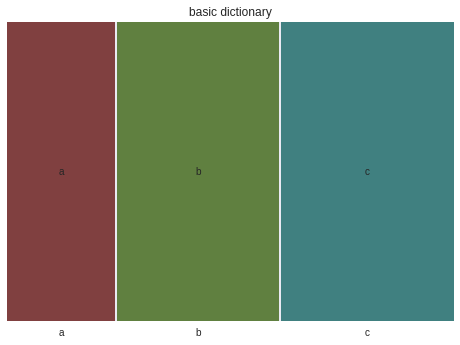

In [2]:
data = {'a': 10, 'b': 15, 'c': 16}
mosaic(data, title='basic dictionary')
plt.show()

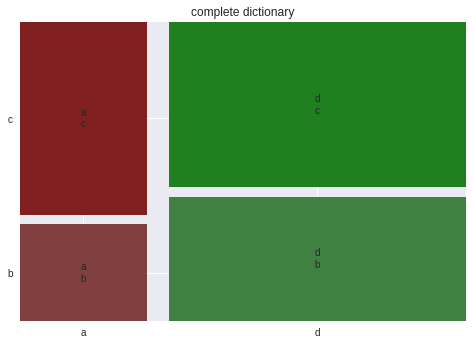

In [3]:
data = {('a', 'b'): 1, ('a', 'c'): 2, ('d', 'b'): 3, ('d', 'c'): 4}
mosaic(data, gap=0.05, title='complete dictionary')
plt.show()

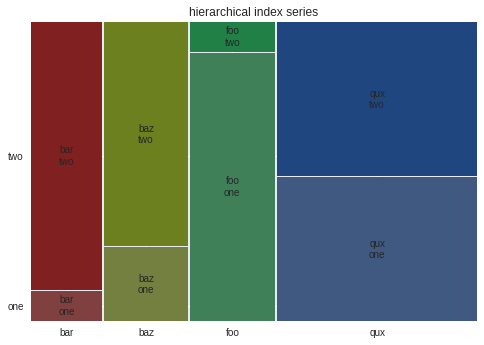

In [4]:
rand = np.random.random
tuples = list(product(['bar', 'baz', 'foo', 'qux'], ['one', 'two']))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
data = pd.Series(rand(8), index=index)
mosaic(data, title='hierarchical index series')
plt.show()

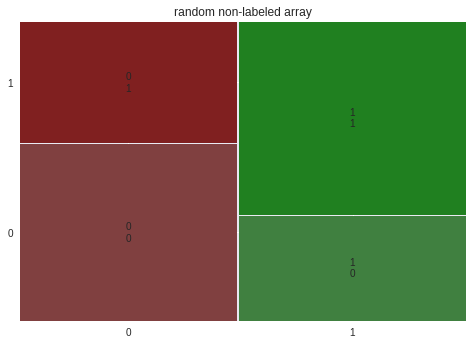

In [5]:
rand = np.random.random
data = 1+rand((2,2))
mosaic(data, title='random non-labeled array')
plt.show()

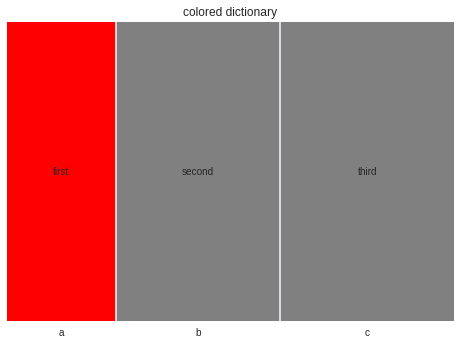

In [6]:
data = {'a': 10, 'b': 15, 'c': 16}
props = lambda key: {'color': 'r' if 'a' in key else 'gray'}
labelizer = lambda k: {('a',): 'first', ('b',): 'second', ('c',): 'third'}[k]
mosaic(data, title='colored dictionary', properties=props, labelizer=labelizer)
plt.show()

## Mosaic Plot And Heat Map

In [7]:
data = [
    ['A','a',2,-0.3],
    ['A','b',3,0.4],
    ['A','c',5,-0.7],
    ['B','a',2,0.8],
    ['B','b',2,-0.2],
    ['B','c',5,0.1]
]
columns = ['Column1', 'Column2', 'area', 'value']
df = pd.DataFrame(data=data, columns=columns)
df

,Column1,Column2,area,value
0,A,a,2,-0.3
1,A,b,3,0.4
2,A,c,5,-0.7
3,B,a,2,0.8
4,B,b,2,-0.2
5,B,c,5,0.1


In [8]:
df['tuple'] = list(zip(df.Column1, df.Column2))
df = df.set_index('tuple')
df = df.drop(['Column1', 'Column2'], axis=1)
df

,area,value
tuple,,
"(A, a)",2,-0.3
"(A, b)",3,0.4
"(A, c)",5,-0.7
"(B, a)",2,0.8
"(B, b)",2,-0.2
"(B, c)",5,0.1


In [9]:
data_dic = df.to_dict('index')
data_dic

{('A', 'a'): {'area': 2.0, 'value': -0.29999999999999999},
 ('A', 'b'): {'area': 3.0, 'value': 0.40000000000000002},
 ('A', 'c'): {'area': 5.0, 'value': -0.69999999999999996},
 ('B', 'a'): {'area': 2.0, 'value': 0.80000000000000004},
 ('B', 'b'): {'area': 2.0, 'value': -0.20000000000000001},
 ('B', 'c'): {'area': 5.0, 'value': 0.10000000000000001}}

In [10]:
def normalize_for_color(value, ratio):
    return max(min(value / ratio + 0.5, 0.99), 0.01)

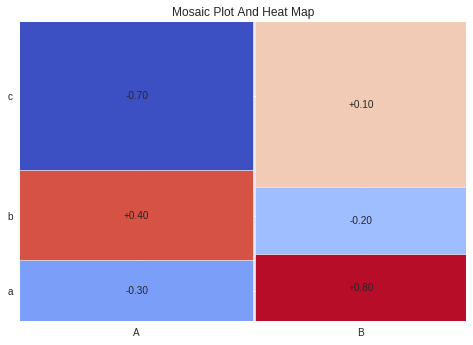

In [11]:
props = lambda k: {'color': cm.coolwarm(normalize_for_color(data_dic[k].get('value'), 1.0))}
labelizer = lambda k: "{0:+.02f}".format(data_dic[k].get('value'))
mosaic(df.area, title='Mosaic Plot And Heat Map', properties=props, labelizer=labelizer, gap=0.005)
plt.show()